## 3. Part 1: Customer Segmentation Report

The main bulk of your analysis will come in this part of the project. Here, you should use unsupervised learning techniques to describe the relationship between the demographics of the company's existing customers and the general population of Germany. By the end of this part, you should be able to describe parts of the general population that are more likely to be part of the mail-order company's main customer base, and which parts of the general population are less so.

#### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

%matplotlib inline

#### Load Processed Data

In [3]:
azdias_scaled = pickle.load(open(r"U:\arvato_data\azdias_scaled.pickle", "rb"))

In [4]:
customers_scaled = pickle.load(open(r"U:\arvato_data\customers_scaled.pickle", "rb"))

In [5]:
azdias_scaled.shape

(750284, 613)

In [6]:
customers_scaled.head()

,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,ARBEIT,BALLRAUM,CAMEO_DEUG_2015,D19_BANKEN_DIREKT,...,GEBAEUDETYP_6.0,GEBAEUDETYP_8.0,FINANZTYP_2.0,FINANZTYP_3.0,FINANZTYP_4.0,FINANZTYP_5.0,FINANZTYP_6.0,NATIONALITAET_KZ_1.0,NATIONALITAET_KZ_2.0,NATIONALITAET_KZ_3.0
0,-0.279911,-0.128558,-0.264907,-0.203160,-0.263158,-0.134519,-1.818381,-0.611942,-1.40217,-0.426604,...,-0.031774,-0.417667,1.542496,-0.143535,-0.114268,-0.707956,-0.670168,0.206287,-0.129379,-0.099008
1,-0.279911,-0.128558,-0.264907,-0.917164,-0.263158,-0.134519,0.165508,1.277295,0.27563,-0.426604,...,-0.031774,2.394251,1.542496,-0.143535,-0.114268,-0.707956,-0.670168,0.206287,-0.129379,-0.099008
2,-0.352184,0.000796,-0.264907,-1.631168,-0.263158,-0.134519,-1.818381,1.277295,-0.14382,-0.426604,...,-0.031774,-0.417667,-0.648300,-0.143535,-0.114268,-0.707956,1.492163,0.206287,-0.129379,-0.099008
3,0.153723,-0.128558,-0.264907,1.224848,0.174495,-0.134519,0.165508,-0.611942,1.11453,2.089999,...,-0.031774,-0.417667,1.542496,-0.143535,-0.114268,-0.707956,-0.670168,0.206287,-0.129379,-0.099008
4,-0.279911,-0.128558,-0.264907,-0.203160,-0.263158,-0.134519,0.165508,1.277295,0.27563,-0.426604,...,-0.031774,-0.417667,-0.648300,-0.143535,-0.114268,1.412516,-0.670168,0.206287,-0.129379,-0.099008


### 3.1 Perform PCA - Principal Component Analysis

To find the vectors having maximum variance in the data, i will apply PCA. In the beginning i will not set any parameters to get all components computed. I will check the variability of each component and also the cumulative variability of components.

As it can be seen above, we have 613 columns in our both customer and azdias data. I will use PCA in order to understand which columns have most important effects on data. We can see the number of the components and the effects of that commponents on the variability. Thus we can decide if we chould keep the components or leave.

In [7]:
def apply_pca(df, num_comp):
    '''
    Apply PCA transforamtion on data given as data frame (df) by creating components with given number (num_comp)

    INPUT: num_comp --> number of prinicapal components to be created
           df ---> data to be transformed 
           
    OUTPUT: pca - PCA object created after fit the data
            X_pca - Transformed X matrix with principal components
    '''
    pca = PCA(num_comp, random_state = 42)
    X_pca = pca.fit_transform(df)
    return pca, X_pca

In [8]:
# Apply PCA transformation by setting number of component = None
pca_azd ,X_pca_azd = apply_pca(azdias_scaled, None)

In [10]:
# Principle components that represent %90 percent of variance
for i in range(0, 613):
    if np.cumsum(pca_azd.explained_variance_ratio_)[i]> 0.9:
        print("% 90 Cumulative Variance is represented by first {} principal components!".format(i+1))
        break 

% 90 Cumulative Variance is represented by first 323 principal components!


In [11]:
# Variance effect of top 5 principle components
np.cumsum(pca_azd.explained_variance_ratio_)[5]

0.18387667220355683

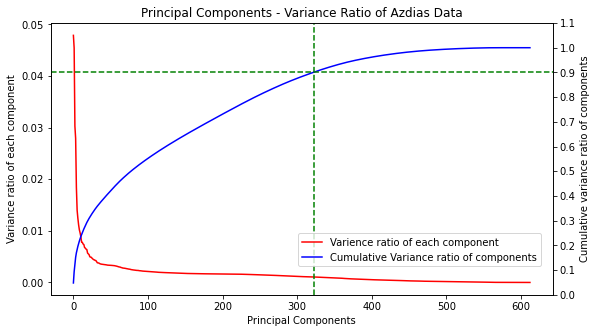

In [12]:
fig, ax1 = plt.subplots(figsize=(9,5))

# Plot variance of each component
ax1.plot(pca_azd.explained_variance_ratio_, label = "Varience ratio of each component", color ="red")
ax1.set_xlabel("Principal Components")
ax1.set_ylabel("Variance ratio of each component")

# Plot cumulative variance of components
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(np.cumsum(pca_azd.explained_variance_ratio_), label='Cumulative Variance ratio of components',color = "blue")
fig.legend(loc=(0.5,0.2))
ax2.set_ylabel("Cumulative variance ratio of components")
ax2.set_yticks(np.arange(0,1.2,0.1))


ax1.set_title("Principal Components - Variance Ratio of Azdias Data")
ax1.axvline(323, linestyle='dashed', color='green')
ax2.axhline(np.cumsum(pca_azd.explained_variance_ratio_)[323], linestyle='dashed', color='green')
plt.show()

From above plot and other informations, we can say that:<br>
* %90 percent of the variance of Azdias data is represented by first 323 principal components.
* Rest of the components have %10 percent effect of variance.
* Most of the components have less than %1 variance.
* Variance of first 5 components is % 18.

I decided to use the first 320 principal components that make up the variance almost % 90.

In [13]:
# Apply PCA transformation by setting number of component = 320
pca_azd_320 ,X_pca_azd_320 = apply_pca(azdias_scaled, 320)

In [14]:
# Transformed to 320 features
X_pca_azd_320.shape

(750284, 320)

In [15]:
# Components (320 features and 613 weigths)
pca_azd_320.components_.shape

(320, 613)

In [16]:
pca_azd_320.components_.shape

(320, 613)

In [17]:
pca_azd_320.explained_variance_ratio_[1]

0.04541356695113335

In [18]:
pca_azd_320.components_[0][0].round(4)

0.0822

### 3.2. Interpretation of  Principal Components

Each principal component is a unit vector that points in the direction of highest variance (after accounting for the variance captured by earlier principal components). The further a weight is from zero, the more the principal component is in the direction of the corresponding feature. If two features have large weights of the same sign (both positive or both negative), then increases in one tend expect to be associated with increases in the other. To contrast, features with different signs can be expected to show a negative correlation: increases in one variable should result in a decrease in the other.

#### Study for Azdias Data

In [19]:
# Create data frame for 320 components  
components_df_azd = pd.DataFrame(pca_azd_320.components_.round(4), columns = azdias_scaled.columns)

# Udate the index of dataframe with names as PC0, PC1, PC2 ...
PC_names = ['PC{}'.format(i) for i in range(0,len(pca_azd_320.components_))]
components_df_azd.index = PC_names
components_df_azd.head(3)

,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,ARBEIT,BALLRAUM,CAMEO_DEUG_2015,D19_BANKEN_DIREKT,...,GEBAEUDETYP_6.0,GEBAEUDETYP_8.0,FINANZTYP_2.0,FINANZTYP_3.0,FINANZTYP_4.0,FINANZTYP_5.0,FINANZTYP_6.0,NATIONALITAET_KZ_1.0,NATIONALITAET_KZ_2.0,NATIONALITAET_KZ_3.0
PC0,0.0822,0.0196,-0.0238,-0.0685,0.0802,-0.0026,0.0911,-0.0735,0.1317,-0.0249,...,-0.0016,0.0266,-0.0483,-0.0356,-0.0000,0.0136,-0.0151,-0.0393,0.0294,0.0127
PC1,0.0212,0.0111,-0.0109,-0.0105,0.0267,0.0023,-0.0070,-0.0047,-0.0057,-0.0117,...,0.0005,-0.0046,0.0200,-0.0040,-0.0061,0.0227,-0.0106,0.0078,-0.0073,-0.0055
PC2,-0.0108,-0.0101,0.0665,0.0426,-0.0129,-0.0049,-0.0322,0.0037,-0.0142,0.0504,...,-0.0023,0.0044,-0.0777,0.0518,0.0703,-0.0695,-0.0524,-0.0505,0.0377,0.0348


In [20]:
#Create dataframe for variance ratios of 320 components
var_ratio_df_azd = pd.DataFrame(pca_azd_320.explained_variance_ratio_.round(3).reshape(-1,1), 
                            index=PC_names, 
                            columns=["VAR_RATIO"])
var_ratio_df_azd.head(2)

,VAR_RATIO
PC0,0.048
PC1,0.045


In [21]:
# Combine variance dataframe and components dataframe
mapped_comp_df_azd = pd.concat([var_ratio_df_azd, components_df_azd], axis = 1)
mapped_comp_df_azd.head(2)

,VAR_RATIO,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,ARBEIT,BALLRAUM,CAMEO_DEUG_2015,...,GEBAEUDETYP_6.0,GEBAEUDETYP_8.0,FINANZTYP_2.0,FINANZTYP_3.0,FINANZTYP_4.0,FINANZTYP_5.0,FINANZTYP_6.0,NATIONALITAET_KZ_1.0,NATIONALITAET_KZ_2.0,NATIONALITAET_KZ_3.0
PC0,0.048,0.0822,0.0196,-0.0238,-0.0685,0.0802,-0.0026,0.0911,-0.0735,0.1317,...,-0.0016,0.0266,-0.0483,-0.0356,-0.0000,0.0136,-0.0151,-0.0393,0.0294,0.0127
PC1,0.045,0.0212,0.0111,-0.0109,-0.0105,0.0267,0.0023,-0.0070,-0.0047,-0.0057,...,0.0005,-0.0046,0.0200,-0.0040,-0.0061,0.0227,-0.0106,0.0078,-0.0073,-0.0055


Define a function including same steps above: 
* Create a dataframe of principal components
* Create a dataframe of variance ratios
* Combine two dataframes

In [22]:
def map_components(df, pca_df):
    '''
    Function maps the principal components with corresponding feature names of data.
    input --> df - dataframe and pca_df - pca object
    output --> mapped_comp_df - mapped components as dataframe
    '''
    # Create data frame for components  
    components_df = pd.DataFrame(pca_df.components_, columns = df.columns)

    # Udate the index of dataframe with names as PC0, PC1, PC2 ...
    PC_names = ['PC{}'.format(i) for i in range(0,len(pca_df.components_))]
    components_df.index = PC_names

    # Create dataframe for variance ratios of 320 components
    var_ratio_df = pd.DataFrame(pca_df.explained_variance_ratio_.reshape(-1,1), 
                                index=PC_names, 
                                columns=["VAR_RATIO"])

    # Combine variance dataframe and components dataframe
    mapped_comp_df = pd.concat([var_ratio_df, components_df], axis = 1)
    
    return mapped_comp_df

Define a function that plots :
* Most weighted n features of dfx at given component of given data
* Value distributions of most weighted features on given data
* A series object contains most weighted n features 

In [23]:

def plot_most_least_weighted(mapped_comp_df_azd, most_least_n, PC_n=0, data="Azdias"):
    '''
    Plots and create a series of most and least weighted features at given Principal Component of given data
    
    inputs: mapped_comp_df_azd --> Data frame of components 
            most_least_n --> integer; for most or least 5 feature, enter 5.
            PC_n --> interger for Principal Component; for first PC enter 0 
            data --> name of the data as string ("Azdias" or "Customers")
    
    output: bar plot and weights(as pd.series) 
    
    '''
    df = mapped_comp_df_azd.drop("VAR_RATIO", axis = 1, inplace = False)
    weights = df.iloc[PC_n].sort_values(ascending = False)
    
    fig1, ax1 = plt.subplots(figsize=(5,3))
    weights[:most_least_n].append(weights[-most_least_n:]).plot(kind="barh",ax = ax1)
    plt.title("Most and least weighted {} features at Principal Component-PC{} of {} data"\
              .format(most_least_n,PC_n,data),color = "red")
    plt.xlabel("Weights")
    plt.show()

    
       
    return weights[:most_least_n].append(weights[-most_least_n:])

In [24]:
# Mapp weights of 613 columns on principal components @ Azdias Data
mapped_comp_df_azd = map_components(azdias_scaled, pca_azd_320)

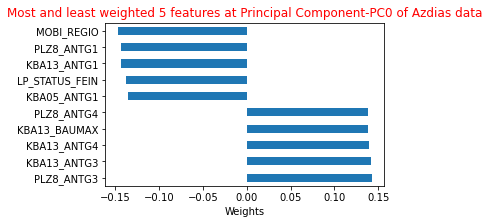

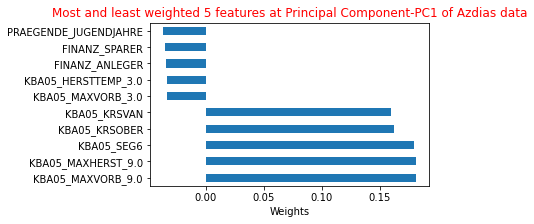

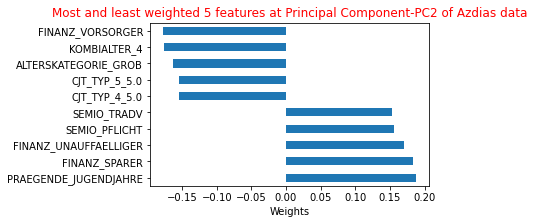

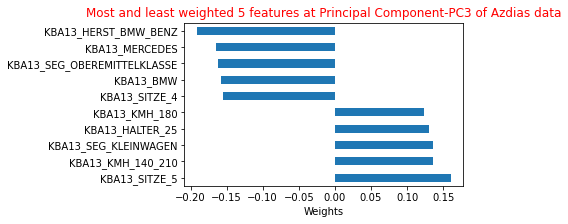

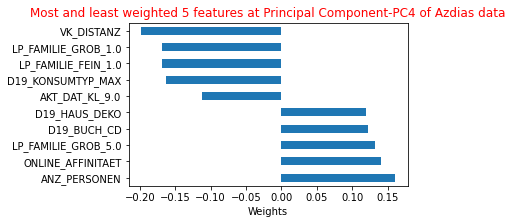

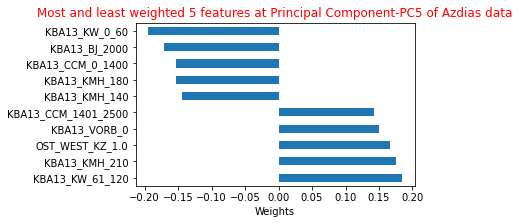

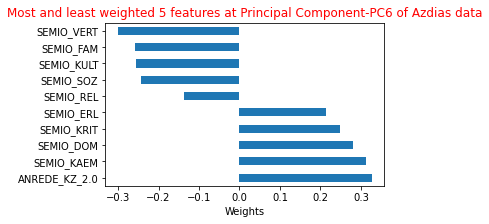

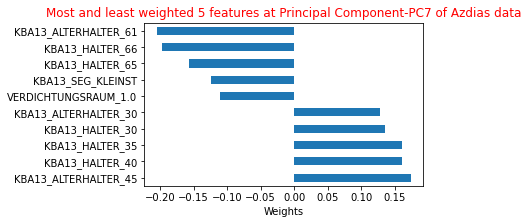

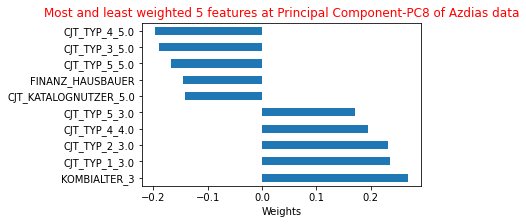

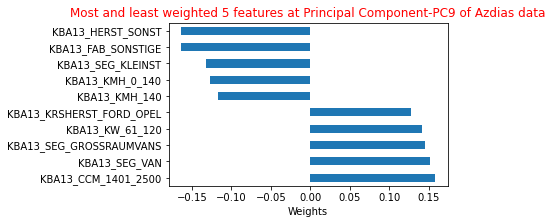

In [25]:
# Plot weighted features on top 10 PCs of Azdias Data
for i in range(10):
    plot_most_least_weighted(mapped_comp_df_azd, most_least_n = 5, PC_n=i, data="Azdias")
    #save_name = "Most weighted Features of PC{}".format(i) + ".png"
    #plt.savefig(save_name)
    plt.show()

### 3.3 Perform K-Means Clustering

In order to understand the behaviour of customers, i will create clusters.

In [26]:
# Define elbow function to use deciding number of cluster
def elbow(X_pca, n_cluster_start, n_cluster_stop, step):
    '''
    Input -> X_pca-Array of transformed data,
             n_cluster_start-starting number for cluster (integer)
             n_cluster_stop-stopping number for cluster (integer)
             step-increasing step of clusters (integer)
    
    Output -> List of scores for each cluster
              Elbow diagram
    
    '''
    # Create Score for each cluster
    scores = []
    for i in range(n_cluster_start, n_cluster_stop, step):
        kmeans = KMeans(n_clusters = i , random_state=42)
        model = kmeans.fit(X_pca)
        score = np.abs(model.score(X_pca))
        scores.append(score)
    
    # Plot Elbow graph
    plt.plot(range(n_cluster_start, n_cluster_stop, step), 
             scores, 
             marker='o', color='red');
    plt.xlabel('Number of clsuters');
    plt.ylabel('Sum of squared errors');
    plt.title('Scores vs Number of Cluster');
    plt.savefig('elbow.png');
    
    return scores


In [27]:
# Elbow plot study for Customers Data

#scores_cus = elbow(X_pca_cus_320, 1, 22, 2)

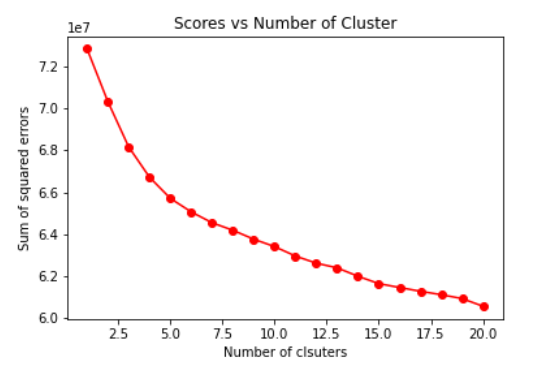

According to elbow method, we can get the number of clusters = 8. 

In [28]:
# Cluster the population (Azdias data) taking n_clusters = 8
kmeans_azd = KMeans(n_clusters=8, random_state=42)
model_azd = kmeans_azd.fit(X_pca_azd_320)
clusters_azdias = model_azd.predict(X_pca_azd_320)


In [29]:
# Apply PCA transformation on customer data using the PCA model generated using Azdias
pca_cus_320 = pca_azd_320.transform(customers_scaled)

In [30]:
# Perform clustering on customers by the model generated using azdias 
clusters_customers = model_azd.predict(pca_cus_320)

In [31]:
print("Shape of azdias_scaled: ",azdias_scaled.shape)
print("Shape of customers_scaled: ",customers_scaled.shape,"\n")

print("Shape of X_pca_azd_320: ",X_pca_azd_320.shape)
print("Shape of pca_cus_320: ",pca_cus_320.shape,"\n")

print("Shape of clusters_azdias: ",clusters_azdias.shape)
print("Shape of clusters_customers: ",clusters_customers.shape)

Shape of azdias_scaled:  (750284, 613)
Shape of customers_scaled:  (134844, 613) 

Shape of X_pca_azd_320:  (750284, 320)
Shape of pca_cus_320:  (134844, 320) 

Shape of clusters_azdias:  (750284,)
Shape of clusters_customers:  (134844,)


In [32]:
# Calculate percentage of labels in Azdias Clusters
clusters_perc_azdias = []
labels_azdias = []
for label in np.unique(clusters_azdias):
    label_percent = np.round((clusters_azdias[clusters_azdias == label].size/clusters_azdias.size*100),1)
    clusters_perc_azdias.append(label_percent)
    labels_azdias.append(label)

labels_azdias, clusters_perc_azdias

([0, 1, 2, 3, 4, 5, 6, 7], [10.5, 13.8, 14.0, 18.5, 16.7, 16.0, 8.5, 1.9])

In [33]:
# Calculate percentage of labels in Customer Clusters
clusters_perc_customers = []
labels_customers = []
for label in np.unique(clusters_customers):
    label_percent = np.round((clusters_customers[clusters_customers == label].size/clusters_customers.size*100),1)
    clusters_perc_customers.append(label_percent)
    labels_customers.append(label)

labels_customers, clusters_perc_customers

([0, 1, 2, 3, 4, 5, 6, 7], [18.4, 15.6, 5.2, 25.8, 19.8, 9.4, 5.2, 0.7])

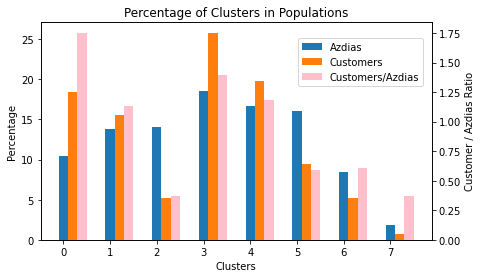

In [34]:
# Plot cluster percentages
fig, ax = plt.subplots(figsize=(7,4))
width = 0.2 # width of bar
x = np.array(labels_azdias)

ax.bar(x, clusters_perc_azdias, width,  label='Azdias')
ax.bar(x + width, clusters_perc_customers, width, label='Customers')
ax.set_ylabel('Percentage')
ax.set_xlabel('Clusters')
ax.set_title('Percentage of Clusters in Populations')

ax1 = ax.twinx()
ax1.bar(x + 2*width, 
       np.array(clusters_perc_customers)/np.array(clusters_perc_azdias), 
       width, color = "pink",
       label='Customers/Azdias')
fig.legend(bbox_to_anchor=(0.85, 0.85))
ax1.set_ylabel("Customer / Azdias Ratio")
plt.show()

According to above chart:
* We have cluster-0 and cluster-3 at the top with highest Customer/Azdias Ratio. So they are the mostly represented customer cluster in the general German population. 
* We have cluster-2 and cluster-7 at the bottom with lowest Customer/Azdias Ratio. So they are the lowest representers.

I will now investigate the component weights of those clusters:

In [35]:
model_azd.cluster_centers_.shape

(8, 320)

In [36]:
# Create dataframe as components at rows and clusters at columns
weights_df = pd.DataFrame(model_azd.cluster_centers_.T, 
                     columns = ["Cluster_{}".format(i) for i in range(0,8)],
                     index = ["PC{}".format(i) for i in range(0,320)]
                    )
weights_df.head()

,Cluster_0,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7
PC0,-1.772837,-6.085068,6.862047,-5.027546,4.243471,-1.022608,4.038835,5.777679
PC1,1.038222,-0.658997,-2.129802,0.393190,-0.767515,-1.108280,-1.981596,36.764200
PC2,-1.166772,3.390298,3.432077,-3.519054,-3.705788,3.846785,-2.803462,3.591485
PC3,-6.488600,1.018522,-0.633295,0.996012,-1.031708,0.346160,5.645103,4.557455
PC4,0.896254,3.081708,0.337582,-1.342632,0.114085,-3.146940,1.858615,0.402733


In [39]:
# Plot most and leat weighted 5 components of Clusters
def plot_weighted_clusters(cluster_id):
    
    fig, ax = plt.subplots(figsize=(5,3))
    a = weights_df.iloc[:,cluster_id].sort_values(ascending = False)
    a[:5].append(a[-5:]).plot(kind="barh",ax = ax)
    plt.title("Most and least weighted 5 Principal Components of Cluster_{}"\
                  .format(cluster_id),color = "red")
    plt.xlabel("Weights")
    plt.show()

#### For Mostly represented clusters -> Cluster_0 

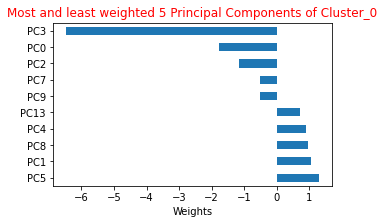

In [41]:
# Plot
plot_weighted_clusters(0)

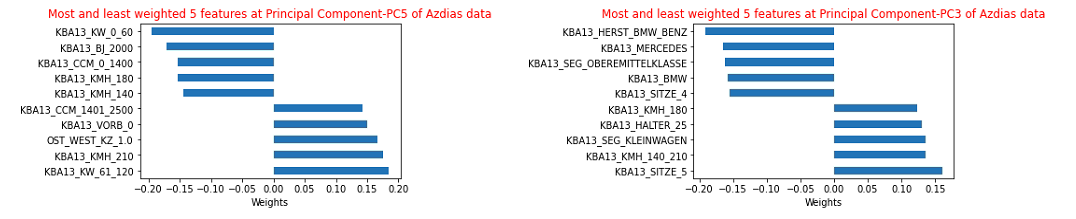

* Component PC5 is most positively effected on this cluster.   
* Component PC3 is most negatively effected on this cluster.
* Also PC3 effected almost 6 times than PC5.
* Thus, we can evaluate cluster according to PC3; Cluster in negatively corelated with PC3. And PC3 is negatively corelated with below fetures.
<br>

* Top 5 negative effected features of PC3:<br>
KBA13_HERST_BMW_BENZ	share of BMW & Mercedes Benz within the PLZ8<br>
KBA13_MERCEDES	share of MERCEDES within the PLZ8<br>
KBA13_SEG_OBEREMITTELKLASSE	share of upper middle class cars and upper class cars (BMW5er, BMW7er etc.)<br>
KBA13_BMW	share of BMW within the PLZ8<br>
KBA13_SITZE_4	number of cars with less than 5 seats in the PLZ8








#### For under-represented Cluster --> Cluster-2

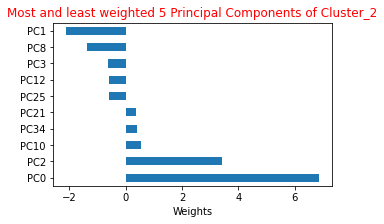

In [42]:
# Plot
plot_weighted_clusters(2)

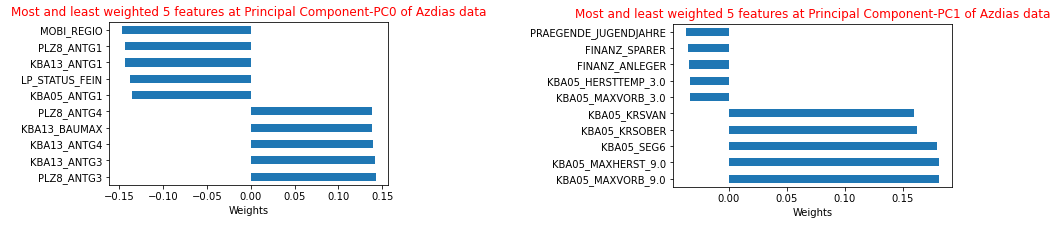

* Component PC0 is most positively effected on this cluster.   
* Component PC1 is most negatively effected on this cluster.
* Also PC0 effected almost 3 times than PC1.
* Thus, we can evaluate cluster according to PC0; Cluster is positively corelated with PC0. And PC0 is positively corelated with below fetures.
<br>

* Positive effected features of PC0:<br>
PLZ8_ANTG3	number of 6-10 family houses in the PLZ8<br>
PLZ8_ANTG4	number of >10 family houses in the PLZ8
<br>

                                                      Notebook Continues with "4.Part2:Supervised Learning Model-->